#### Setup

In [16]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal
import IPython.display
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment


In [5]:
duration = 2

In [25]:
raw_file_name = "/media/bighdd7/tianjunm/datasets/original/FSDKaggle/train/e07214a4.wav"
raw_wav = AudioSegment.from_file(raw_file_name)
print(raw_wav.sample_width)
print(raw_wav.frame_rate)
print(raw_wav.channels)

sr, data = scipy.io.wavfile.read(raw_file_name)

print(len(raw_wav.raw_data))
print(len(data))

2
44100
1
428652
214326


In [6]:
file_name = '/media/bighdd7/tianjunm/datasets/processed/train/1/agg.wav'
sr, data = scipy.io.wavfile.read(file_name)
print("sample rate: %d" %sr)
print("nsamples: %d" %len(data))

sample rate: 44100
nsamples: 88200


In [13]:

data_resamp = AudioSegment.from_file(file_name, format="wav", frame_rate=22050, channels=1)

# data_resamp = AudioSegment(
#     data=data,
#     sample_width=2,
#     frame_rate=22050,
#     channels=1)

print(len(data_re
# data_resamp.export("tmp/agg_trim.wav", format="wav")

<_io.BufferedRandom name='tmp/agg_trim.wav'>

In [14]:
sr_trim, data_trim = scipy.io.wavfile.read("tmp/agg_trim.wav")

In [15]:
print("sample rate: %d" %sr_trim)
print("nsamples: %d" %len(data_trim))

sample rate: 22050
nsamples: 88200


we want to trim the data to get a smaller T-F representation while maintaining essential features of original audio

In [279]:
# T resample with scipy, F resample with 
tgt_samp_len = len(data) // 2
data_resamp = scipy.signal.resample(data, tgt_samp_len)
sr_resamp = tgt_samp_len // duration

print(data_resamp.shape)
print(sr_resamp)

(44100,)
22050


In [281]:
pre_emphasis = 0.95
emph_data_resamp = np.append(data_resamp[0], data_resamp[1:] - pre_emphasis * data_resamp[:-1])

In [283]:
IPython.display.Audio(data=data, rate=sr)

In [285]:
IPython.display.Audio(data=data_resamp, rate=sr_resamp)

In [286]:
IPython.display.Audio(data=emph_data_resamp, rate=sr_resamp)

pre-emphasis

In [307]:
print(data_resamp.shape)

freq, times, spect = scipy.signal.stft(
    data_resamp, 
    fs=sr_resamp,
    nperseg=256,
    noverlap=256 // 4)
print(spect.shape)

_, rdata = scipy.signal.istft(
    spect,
    fs=sr_resamp,
    nperseg=256,
    noverlap=256 // 4)

print(rdata.shape)

(44100,)
(129, 231)
(44160,)


In [301]:
def display(spect, sample_rate, y_axis='mel',x_axis='time'):
    db_data = librosa.power_to_db(np.abs(spect)**2, ref=np.max)
    librosa.display.specshow(db_data, sr=sample_rate, y_axis=y_axis, x_axis=x_axis)

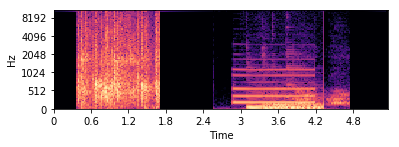

In [302]:
plt.subplot(2, 1, 1)
display(spect, sr_resamp)

In [303]:
IPython.display.Audio(data=data_resamp, rate=sr_resamp)

In [306]:
IPython.display.Audio(data=rdata, rate=sr_resamp)